<a href="https://colab.research.google.com/github/Cliffochi/aviva_data_science_course/blob/main/wheat_and_chessboard_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# Q1. Wheat and the Chessboard Problem
import numpy as np
import matplotlib.pyplot as plt

# creating and array of the squares on the board
squares = np.arange(64, dtype=object) # this avoids overflow since we expect a large figure output
# computing the grains per square using log to base 2 since the number is doubling per square
grains_per_square = 2 ** squares
# total no. of grains i.e. sum of everything
total_grains = grains_per_square.sum()

# display the total value
print(f"Total grains on chessboard: {total_grains}")

Total grains on chessboard: 18446744073709551615


In [11]:
# Q2. Think in small blocks
# no need to import numpy again
# creating a 1D list
n_squares = 4
small_board_list = [1]
for _ in range(n_squares - 1):
  small_board_list.append(small_board_list[-1] * 2)

# converting to ndarry and reshape
small_board_list_ndarry = np.array(small_board_list).reshape(2,2)
print("2x2 chessboard:\n", small_board_list_ndarry)

2x2 chessboard:
 [[1 2]
 [4 8]]


In [14]:
#Q3.1 8x8 chessboard: A function that returns an ndarray containing the number of grains on an nxm chessboard
def wheat_chessboard(n, m):
  total_squares = n * m
  grains = [1] # starting with one grain
  for _ in range(1, total_squares):
    grains.append(grains[-1] * 2) #doubles no. of grains

  chessboard = np.array(grains, dtype=np.uint64).reshape(n,m)
  total = chessboard.sum()

  return chessboard, total


In [17]:
# test 8x8 board
board_8x8, total_grains = wheat_chessboard(8, 8)
print("8x8 chesboard:\n", board_8x8[:8, :8])
print("\nTotal grains on Chessoard:", total_grains)

8x8 chesboard:
 [[                  1                   2                   4
                    8                  16                  32
                   64                 128]
 [                256                 512                1024
                 2048                4096                8192
                16384               32768]
 [              65536              131072              262144
               524288             1048576             2097152
              4194304             8388608]
 [           16777216            33554432            67108864
            134217728           268435456           536870912
           1073741824          2147483648]
 [         4294967296          8589934592         17179869184
          34359738368         68719476736        137438953472
         274877906944        549755813888]
 [      1099511627776       2199023255552       4398046511104
        8796093022208      17592186044416      35184372088832
       70368744177664    

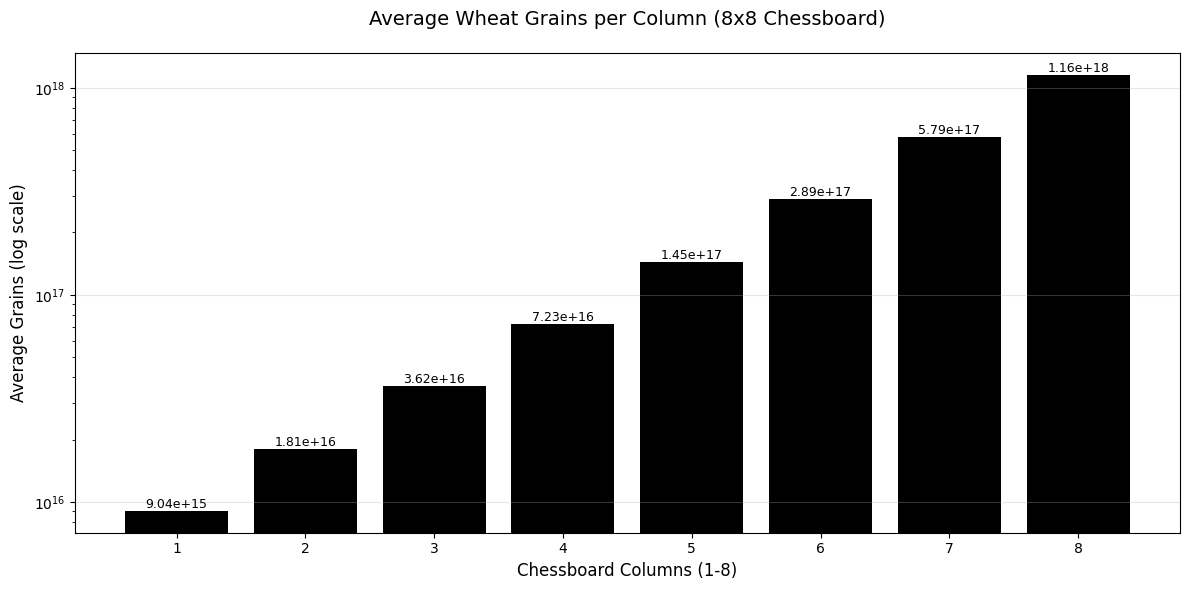

Column Averages:
Column 1: 9.04e+15 grains (average)
Column 2: 1.81e+16 grains (average)
Column 3: 3.62e+16 grains (average)
Column 4: 7.23e+16 grains (average)
Column 5: 1.45e+17 grains (average)
Column 6: 2.89e+17 grains (average)
Column 7: 5.79e+17 grains (average)
Column 8: 1.16e+18 grains (average)

Total grains on chessboard: 18446744073709551615


In [25]:
#Q3.2 8x8 chessboard - Column wheat averages and graph
import matplotlib.pyplot as plt
chessboard, total_grains = wheat_chessboard(8, 8)
column_avgs = chessboard.mean(axis=0)

# ploting graph
plt.figure(figsize=(12, 6))
bars = plt.bar(range(1, 9), column_avgs, color='black')
# Customize the plot
plt.title('Average Wheat Grains per Column (8x8 Chessboard)', fontsize=14, pad=20)
plt.xlabel('Chessboard Columns (1-8)', fontsize=12)
plt.ylabel('Average Grains (log scale)', fontsize=12)
plt.yscale('log')  # Use log scale due to exponential growth
plt.grid(axis='y', alpha=0.3)

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2e}',
             ha='center', va='bottom', fontsize=9)

plt.xticks(range(1, 9))
plt.tight_layout()
plt.show()

# Return key statistics
print("Column Averages:")
for col, avg in enumerate(column_avgs, 1):
    print(f"Column {col}: {avg:.2e} grains (average)")

print(f"\nTotal grains on chessboard: {chessboard.sum()}")

([<matplotlib.axis.YTick at 0x7eaca1e1c3d0>,
 [Text(0, 0.5, '1'),
  Text(0, 1.5, '2'),
  Text(0, 2.5, '3'),
  Text(0, 3.5, '4'),
  Text(0, 4.5, '5'),
  Text(0, 5.5, '6'),
  Text(0, 6.5, '7'),
  Text(0, 7.5, '8')])

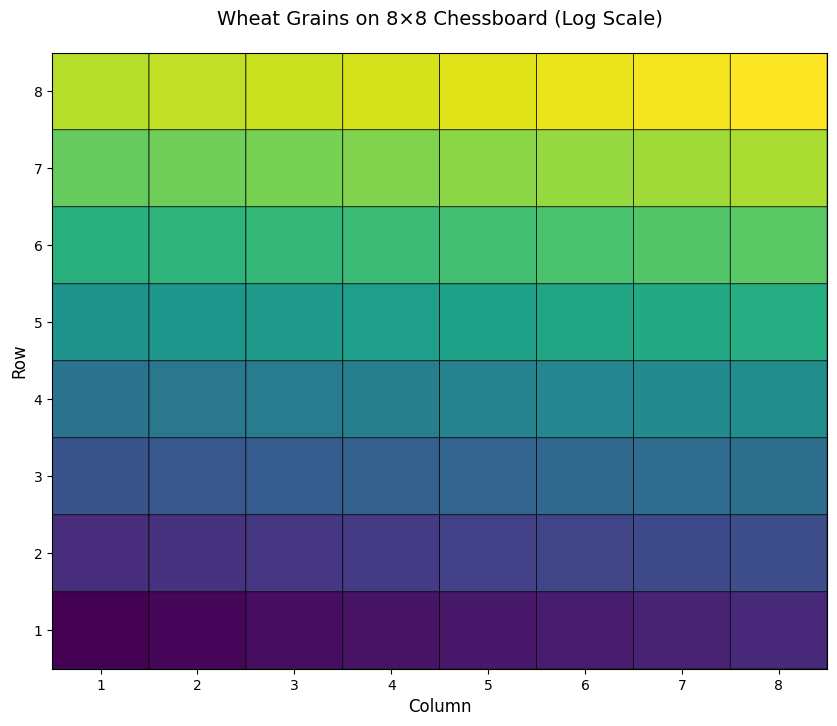

In [28]:
#Q3.3 8x8 chessboard - heatmap of the chessboard grain distribution
# Generate 8×8 chessboard
def wheat_chessboard(n, m):
    grains = [1]
    for _ in range(1, n*m):
        grains.append(2 * grains[-1])
    return np.array(grains, dtype=np.uint64).reshape(n, m)
chessboard = wheat_chessboard(8, 8)

# Create heatmap visualization
plt.figure(figsize=(10, 8))
heatmap = plt.pcolor(np.log10(chessboard),  # Log scale for better contrast
                     cmap='viridis',        # Purple (low) to yellow (high)
                     edgecolors='black',    # Grid lines
                     linewidths=0.5)        # Thin grid lines
# Customize plot
plt.title('Wheat Grains on 8×8 Chessboard (Log Scale)', pad=20, fontsize=14)
plt.xlabel('Column', fontsize=12)
plt.ylabel('Row', fontsize=12)
plt.xticks(np.arange(0.5, 8.5), range(1, 9))
plt.yticks(np.arange(0.5, 8.5), range(1, 9))

In [30]:
# Q4. The second half of the chessboard
# How many times larger is the second half than the first half?

# generate full board
chessboard = np.array([2**n for n in range(64)], dtype=np.uint64).reshape(8,8)

# split into halves
first_half = chessboard[:4, :].sum() # 0-3 rows
second_half = chessboard[4:, :].sum() # 4-7 rows

ratio = second_half / first_half
product = first_half * second_half

print(f"The first half is {first_half} grains.")
print(f"The second half is {second_half} grains.")
print(f"The product of the two halves is {product:.2e} grains.")
print(f"The second half is {ratio:.2e} times larger than the first half.")

The first half is 4294967295 grains.
The second half is 18446744069414584320 grains.
The product of the two halves is 4.29e+09 grains.
The second half is 4.29e+09 times larger than the first half.


<ipython-input-30-fcdcae20effa>:12: RuntimeWarning: overflow encountered in scalar multiply
  product = first_half * second_half


In [44]:
# Q5. Alternative methods: Other calculation methods

import numpy as np
"""Create chessboard using broadcasting"""
def wheat_chessboard_broadcast(n, m):
    exponents = np.arange(n * m, dtype=np.uint64)
    return (2 ** exponents).reshape(n, m)

"""Create chessboard using np.append()"""
def wheat_chessboard_append(n, m):
    grains = np.array([1], dtype=np.uint64)
    for _ in range(1, n * m):
        grains = np.append(grains, 2 * grains[-1])
    return grains.reshape(n, m)

# Calculate for 8x8 chessboard using both methods
board_broadcast = wheat_chessboard_broadcast(8, 8)
board_append = wheat_chessboard_append(8, 8)

# Verify both methods give same result
print("Using broadcasting (first 3x3 corner):\n", board_broadcast[:8, :8])
print("\nUsing np.append (first 3x3 corner):\n", board_append[:8, :8])
print("\nTotal grains (broadcasting):", board_broadcast.sum())
print("Total grains (np.append):", board_append.sum())
print("Methods agree:", np.array_equal(board_broadcast, board_append))

Using broadcasting (first 3x3 corner):
 [[                  1                   2                   4
                    8                  16                  32
                   64                 128]
 [                256                 512                1024
                 2048                4096                8192
                16384               32768]
 [              65536              131072              262144
               524288             1048576             2097152
              4194304             8388608]
 [           16777216            33554432            67108864
            134217728           268435456           536870912
           1073741824          2147483648]
 [         4294967296          8589934592         17179869184
          34359738368         68719476736        137438953472
         274877906944        549755813888]
 [      1099511627776       2199023255552       4398046511104
        8796093022208      17592186044416      35184372088832
 

In [40]:
%%timeit
import numpy as np
"""For loop with Python list"""
def wheat_chessboard(n, m):
  total_squares = n * m
  grains = [1] # starting with one grain
  for _ in range(1, total_squares):
    grains.append(grains[-1] * 2) #doubles no. of grains

  chessboard = np.array(grains, dtype=np.uint64).reshape(n,m)
  total = chessboard.sum()

  return chessboard, total
  # Calculate for 8x8 chessboard
  board_8x8, total_grains = wheat_chessboard(8, 8)

235 ns ± 6.35 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [41]:
%%timeit
import numpy as np
"""Create chessboard using broadcasting"""
def wheat_chessboard_broadcast(n, m):
    exponents = np.arange(n * m, dtype=np.uint64)
    return (2 ** exponents).reshape(n, m)

# Calculate for 8x8 chessboard
board_broadcast = wheat_chessboard_broadcast(8, 8)


2.97 µs ± 138 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [43]:
%%timeit
import numpy as np
"""Create chessboard using np.append()"""
def wheat_chessboard_append(n, m):
    grains = np.array([1], dtype=np.uint64)
    for _ in range(1, n * m):
        grains = np.append(grains, 2 * grains[-1])
    return grains.reshape(n, m)

# Calculate for 8x8 chessboard
board_append = wheat_chessboard_append(8, 8)

381 µs ± 91.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Performance Comparison (8x8 chessboard)
Average of 7 runs

1. Python list + for loop: 235 ns ± 6.35 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
2. NumPy broadcasting: 2.97 µs ± 138 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
3. np.append() + loop: 381 µs ± 91.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)

***Speedup Factors***

- Broadcasting vs list:    12.6x slower
- Broadcasting vs append:  128x faster
- Append vs list:          1,621x slower

Key Observations

Unexpected Result:

1. The Python list method outperformed NumPy broadcasting by 12.6x for small (8×8) arrays.

  Reason: NumPy's broadcasting overhead dominates for tiny problems.

2. Expected Scaling:

   np.append() remains the slowest option (1600x slower than lists).

3. Practical Implications:

   For small arrays (<100 elements): Python lists may be faster

   For large arrays: Broadcasting will eventually dominate (test with 100×100 chessboard)

   np.append() should always be avoided in loops